### Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

### Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### In this notebook i will do some customer personality analysis and make an clustering model to help company acknowledge the behaviours of their customers.

#### For more info about the dataset : https://www.kaggle.com/imakash3011/customer-personality-analysis

### If the code output can't be displayed in github, this notebook can also be viewed in my kaggle notebook:
### https://www.kaggle.com/danielbeltsazar/customer-segmentation-clustering

# 1. Importing Library an Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from matplotlib import colors
from sklearn import metrics
import warnings
import sys

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('marketing_campaign.csv',sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Our data has 2240 entries and 29 columns or feature

# 2. Data Cleaning

## 2.1. Missing Value

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### We have missing values in our income data. We can drop or remove them because there are only 24 missing values, which are very small compared to our whole dataset.

In [5]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

## 2.2. Convert date format column to datetime data type

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [7]:
dates = []
for date in df["Dt_Customer"]:
    date = date.date()
    dates.append(date)

print("Fist Time Customers Purchase : ",min(dates))
print("Last Time Customers Purchase : ",max(dates))

Fist Time Customers Purchase :  2012-01-08
Last Time Customers Purchase :  2014-12-06


# 3. Feature Engineering

### I will add some additional features that might be useful for us and might give us insight

In [8]:
df['Age']=2021-df['Year_Birth']

In [9]:
df['Children_at_home']= df['Kidhome']+df['Teenhome']

In [10]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children_at_home"]

In [11]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children_at_home,Living_With,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,0,Alone,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,2,Alone,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,0,Partner,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,1,Partner,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,1,Partner,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   Wines                2216 non-null   int64         
 10  Fruits               2216 non-null   int64         
 11  Meat                 2216 non-null   int64         
 12  Fish                 2216 non-null   int64         
 13  Sweets               2216 non-nul

### I will drop some columns that we might not use for analysis

In [14]:
df = df.drop(['ID','Z_CostContact','Z_Revenue'],axis=1)

# 4. EDA and Data Visualization

## 4.1. Basic Descriptive Statistics

### Now we will see how our data look like before we continue to explore them

In [15]:
def summary(df,column):
    print("Distinct : ",len(pd.unique(df[column])))
    print("Missing : ",df[column].isnull().sum())
    print("Sum : ",df[column].sum())
    print("Mode : ",st.mode(df[column]))
    print("stddev : ",np.std(df[column]))
    print("CV :",100*(np.std(df[column]))/(np.mean(df[column]))) #coefficient of variation
    print("Min : ",df[column].min())
    print("Max : ",df[column].max())
    print("Mean : ",df[column].mean())
    print("Q1 : ",np.quantile(df[column],0.25))
    print("Q1 : ",np.quantile(df[column],0.5))
    print("Q1 : ",np.quantile(df[column],0.75))

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [17]:
df_encode= df.copy()
for col in df_encode.select_dtypes(include='O').columns:
    df_encode[col]=le.fit_transform(df_encode[col])

In [18]:
for i in df_encode.drop(['Dt_Customer'],axis=1).columns:
    print (i,'\n')
    summary(df_encode.drop(['Dt_Customer'],axis=1),i)
    print("-"*30)

Year_Birth 

Distinct :  59
Missing :  0
Sum :  4362906
Mode :  1976
stddev :  11.982849470420204
CV : 0.6086309085378225
Min :  1893
Max :  1996
Mean :  1968.8203971119133
Q1 :  1959.0
Q1 :  1970.0
Q1 :  1977.0
------------------------------
Education 

Distinct :  5
Missing :  0
Sum :  5305
Mode :  2
stddev :  1.123887129290967
CV : 46.94691571175839
Min :  0
Max :  4
Mean :  2.3939530685920576
Q1 :  2.0
Q1 :  2.0
Q1 :  3.0
------------------------------
Marital_Status 

Distinct :  8
Missing :  0
Sum :  8257
Mode :  3
stddev :  1.0774879698797428
CV : 28.917443880992007
Min :  0
Max :  7
Mean :  3.726083032490975
Q1 :  3.0
Q1 :  4.0
Q1 :  5.0
------------------------------
Income 

Distinct :  1974
Missing :  0
Sum :  115779909.0
Mode :  7500.0
stddev :  25167.396174162965
CV : 48.16979940962394
Min :  1730.0
Max :  666666.0
Mean :  52247.25135379061
Q1 :  35303.0
Q1 :  51381.5
Q1 :  68522.0
------------------------------
Kidhome 

Distinct :  3
Missing :  0
Sum :  979
Mode :  0
std

### We can see from above the statistical behaviour of our data

## 4.2. Basic Analysis and Visualization

### We check our data first

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2216 non-null   int64         
 1   Education            2216 non-null   object        
 2   Marital_Status       2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   Wines                2216 non-null   int64         
 9   Fruits               2216 non-null   int64         
 10  Meat                 2216 non-null   int64         
 11  Fish                 2216 non-null   int64         
 12  Sweets               2216 non-null   int64         
 13  Gold                 2216 non-nul

### FIRST i want to check how does customer with children behave when they buy things in grocery

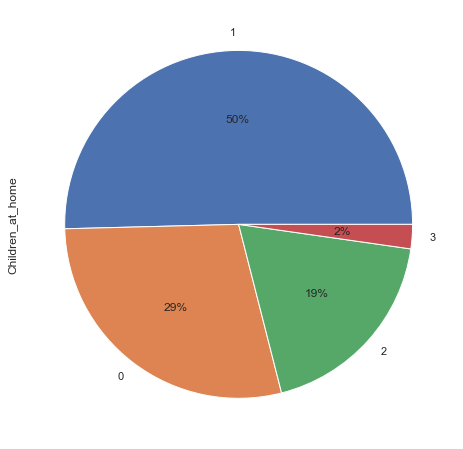

In [22]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Children_at_home'].value_counts().plot(kind="pie", autopct="%.0f%%")
plt.show()

### Our data is dominated by families with one child

<AxesSubplot:xlabel='Children_at_home', ylabel='Wines'>

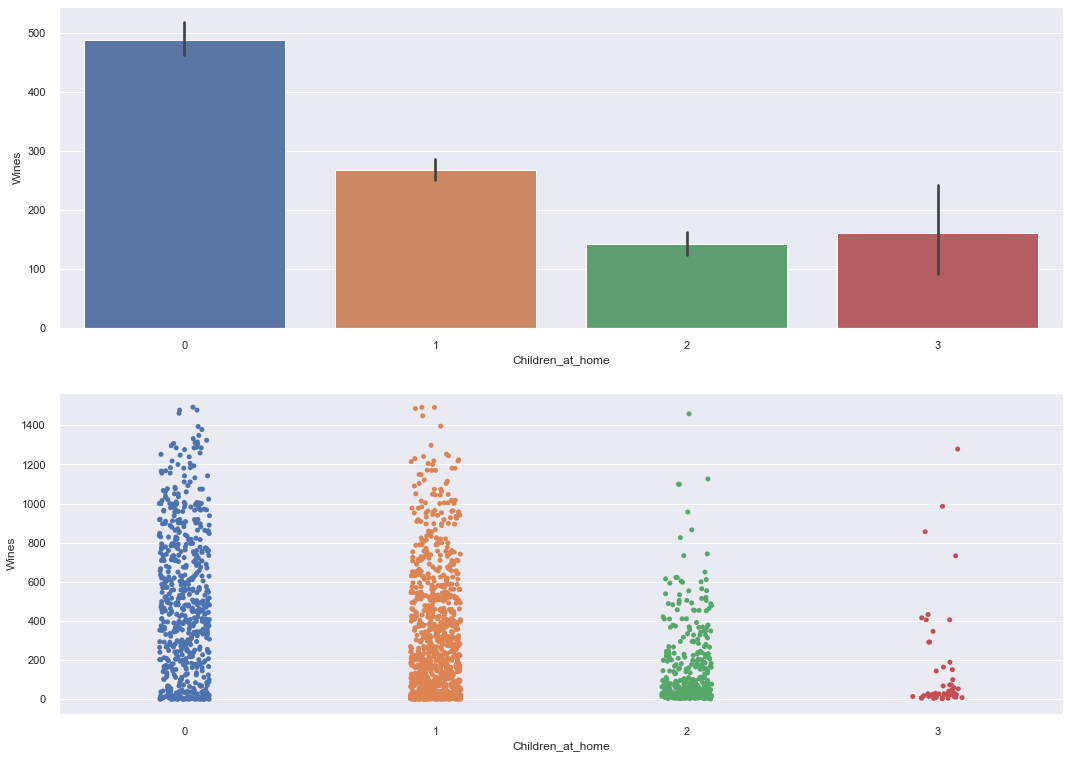

In [21]:
sns.set()
sns.set(rc = {'figure.figsize':(18,13)})
fig, axes = plt.subplots(2, 1)
sns.barplot(x='Children_at_home',y='Wines',data=df,ax=axes[0])
sns.stripplot(x='Children_at_home',y='Wines',data=df,ax=axes[1])

### We can see from above that customers which don't have child tend to buy wines more than customers who have child. But if we see the distribution of the second plot, we notice that customers with 1 child almost have the same tendency with customers with no child to buy wines.

<AxesSubplot:xlabel='Children_at_home', ylabel='Meat'>

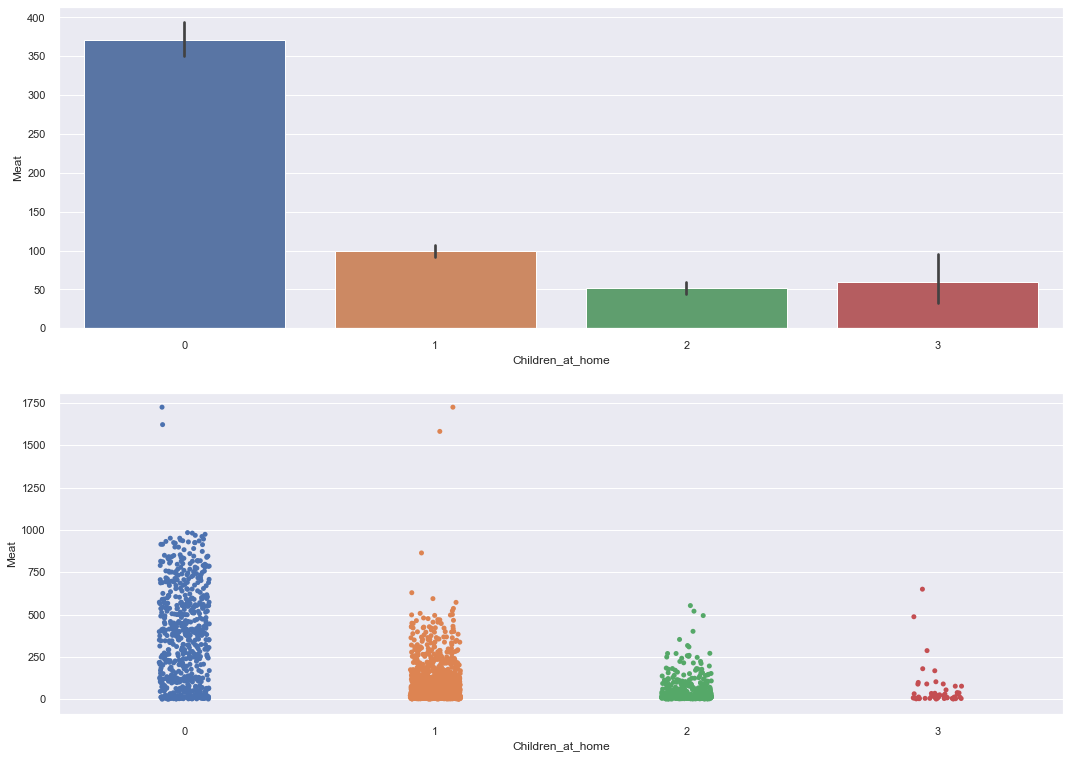

In [22]:
sns.set()
sns.set(rc = {'figure.figsize':(18,13)})
fig, axes = plt.subplots(2, 1)
sns.barplot(x='Children_at_home',y='Meat',data=df,ax=axes[0])
sns.stripplot(x='Children_at_home',y='Meat',data=df,ax=axes[1])

### Same as before, we can see from above that customers which don't have child tend to buy meat more than customers who have child

### Then i want to see how is the average of recency of customers with their relationship feature (Living_With)

In [23]:
df.groupby(['Children_at_home'])['Recency'].mean()

Children_at_home
0    48.898894
1    48.686661
2    49.170673
3    56.420000
Name: Recency, dtype: float64

### All four type of customers related to their children have average of recency of 48-56 days. It means most of them made another transactions again after their previous transaction in the grocery more than 1 month later. Customers with 3 children have the highest recency which is almost 2 months later. Maybe in single transaction, each customer who has 3 children make a big transaction for their family needs.

### SECOND i want to check how does customer's relationship related to things they buy in grocery.

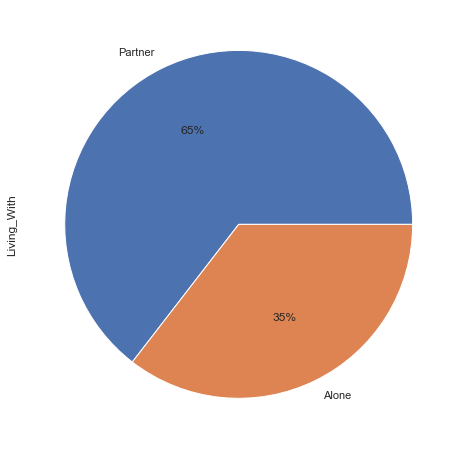

In [21]:
plt.figure(figsize=(13,8))
df['Living_With'].value_counts().plot(kind="pie", autopct="%.0f%%")
plt.show()

### Our data is dominated by customers who have partner.

<AxesSubplot:xlabel='Living_With', ylabel='Wines'>

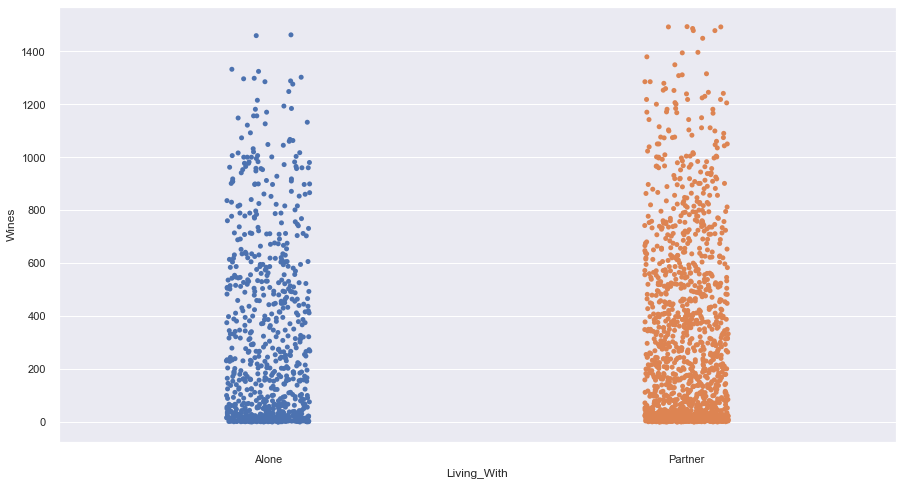

In [25]:
sns.set()
plt.figure(figsize=(15,8))
sns.stripplot(x='Living_With',y='Wines',data=df)

<AxesSubplot:xlabel='Living_With', ylabel='Meat'>

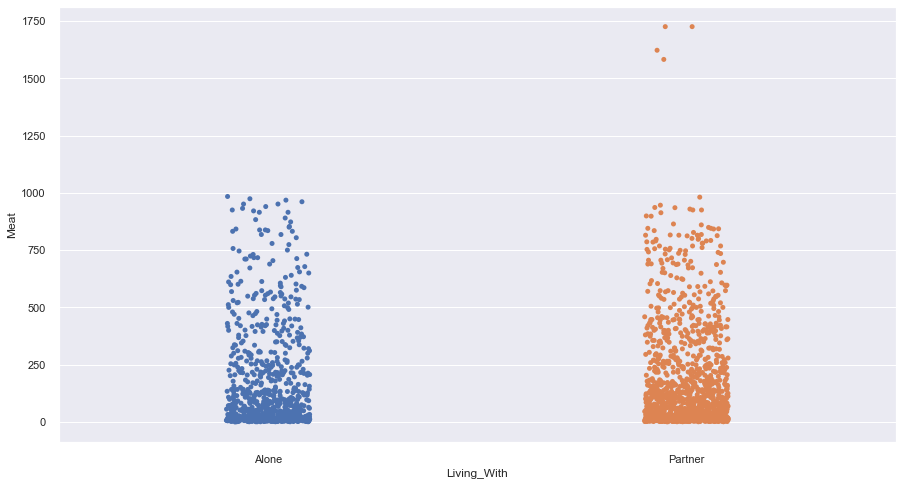

In [26]:
sns.set()
plt.figure(figsize=(15,8))
sns.stripplot(x='Living_With',y='Meat',data=df)

### There isn't so much difference between customers who live alone and customers who live with partner with things they buy in grocery (in this case i only tested for wines and meat).

### Then i want to see how is the average of recency of customers with their relationship feature (Living_With)

In [27]:
df.groupby(['Living_With'])['Recency'].mean()

Living_With
Alone      49.066158
Partner    48.983217
Name: Recency, dtype: float64

### Both customers who live alone and with their partners have average of recency of 48-49 days. It means most of them made another transactions again after their previous transaction in the grocery more than 1 month later. 

### Here i show you visually how our recency data mean in the context of the relationship of children_at_home feature and our recency data.

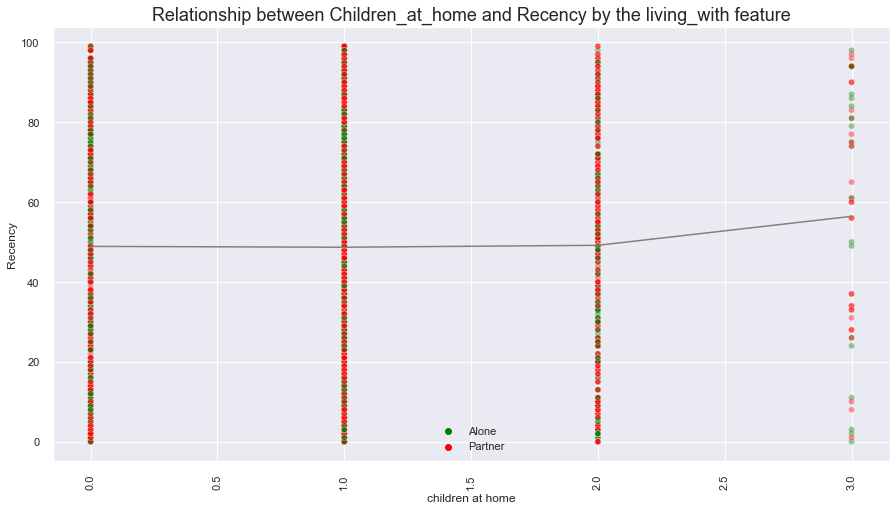

In [28]:
plt.figure(figsize=(15, 8))
ax = sns.scatterplot(x ='Children_at_home',
                    y = df['Recency'],
                    hue = "Living_With",
                    data = df,
                     palette = ["green", "red"],
                     legend="full",
                     alpha = 0.4
                    )


max_price = df.groupby("Children_at_home")['Recency'].mean() 
sns.lineplot(data = max_price,
            ax = ax.axes,
            color="grey")
ax.tick_params(axis= "x", rotation=90)
plt.xlabel("children at home")
plt.ylabel("Recency")
plt.title("Relationship between Children_at_home and Recency by the living_with feature", fontsize = 18)
plt.show()

### And here is how our number of catalog purchases data maximum in the context of education and their living partner.

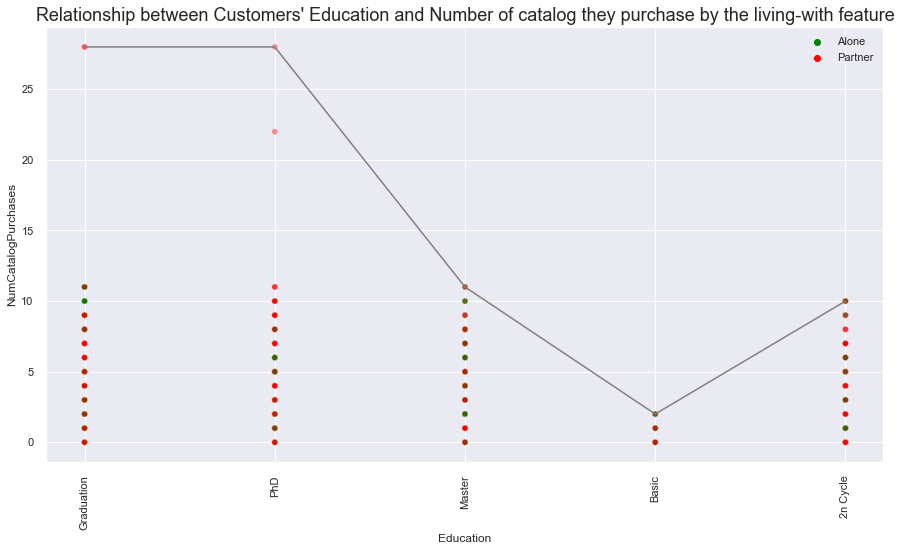

In [29]:
plt.figure(figsize=(15, 8))#Scatter plot
ax = sns.scatterplot(x ='Education',
                    y = df['NumCatalogPurchases'],
                    hue = "Living_With",
                    data = df,
                     palette = ["green", "red"],
                     legend="full",
                     alpha = 0.4
                    )


max_price = df.groupby("Education")['NumCatalogPurchases'].max() 
sns.lineplot(data = max_price,
            ax = ax.axes,
            color="grey")
ax.tick_params(axis= "x", rotation=90)
plt.xlabel("Education")
plt.ylabel("NumCatalogPurchases")
plt.title("Relationship between Customers' Education and Number of catalog they purchase by the living-with feature", fontsize = 18)
plt.show()

### And here is how our income data maximum in the context of education and their living partner.

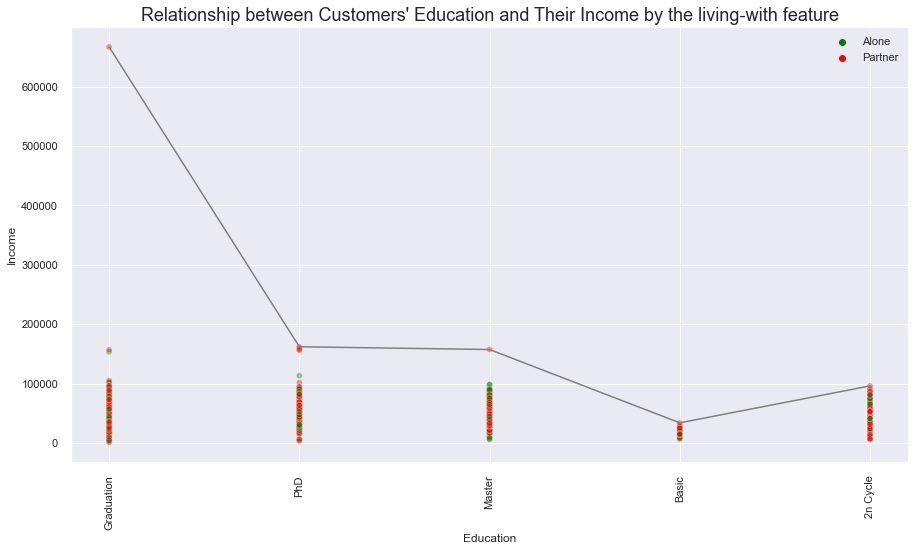

In [30]:
plt.figure(figsize=(15, 8))#Scatter plot
ax = sns.scatterplot(x ='Education',
                    y = df['Income'],
                    hue = "Living_With",
                    data = df,
                     palette = ["green", "red"],
                     legend="full",
                     alpha = 0.4
                    )


max_price = df.groupby("Education")['Income'].max() 
sns.lineplot(data = max_price,
            ax = ax.axes,
            color="grey")
ax.tick_params(axis= "x", rotation=90)
plt.xlabel("Education")
plt.ylabel("Income")
plt.title("Relationship between Customers' Education and Their Income by the living-with feature", fontsize = 18)
plt.show()

## 4.3. Correlation Visualization

### I'll try to make correlation heatmap of our data features

<AxesSubplot:>

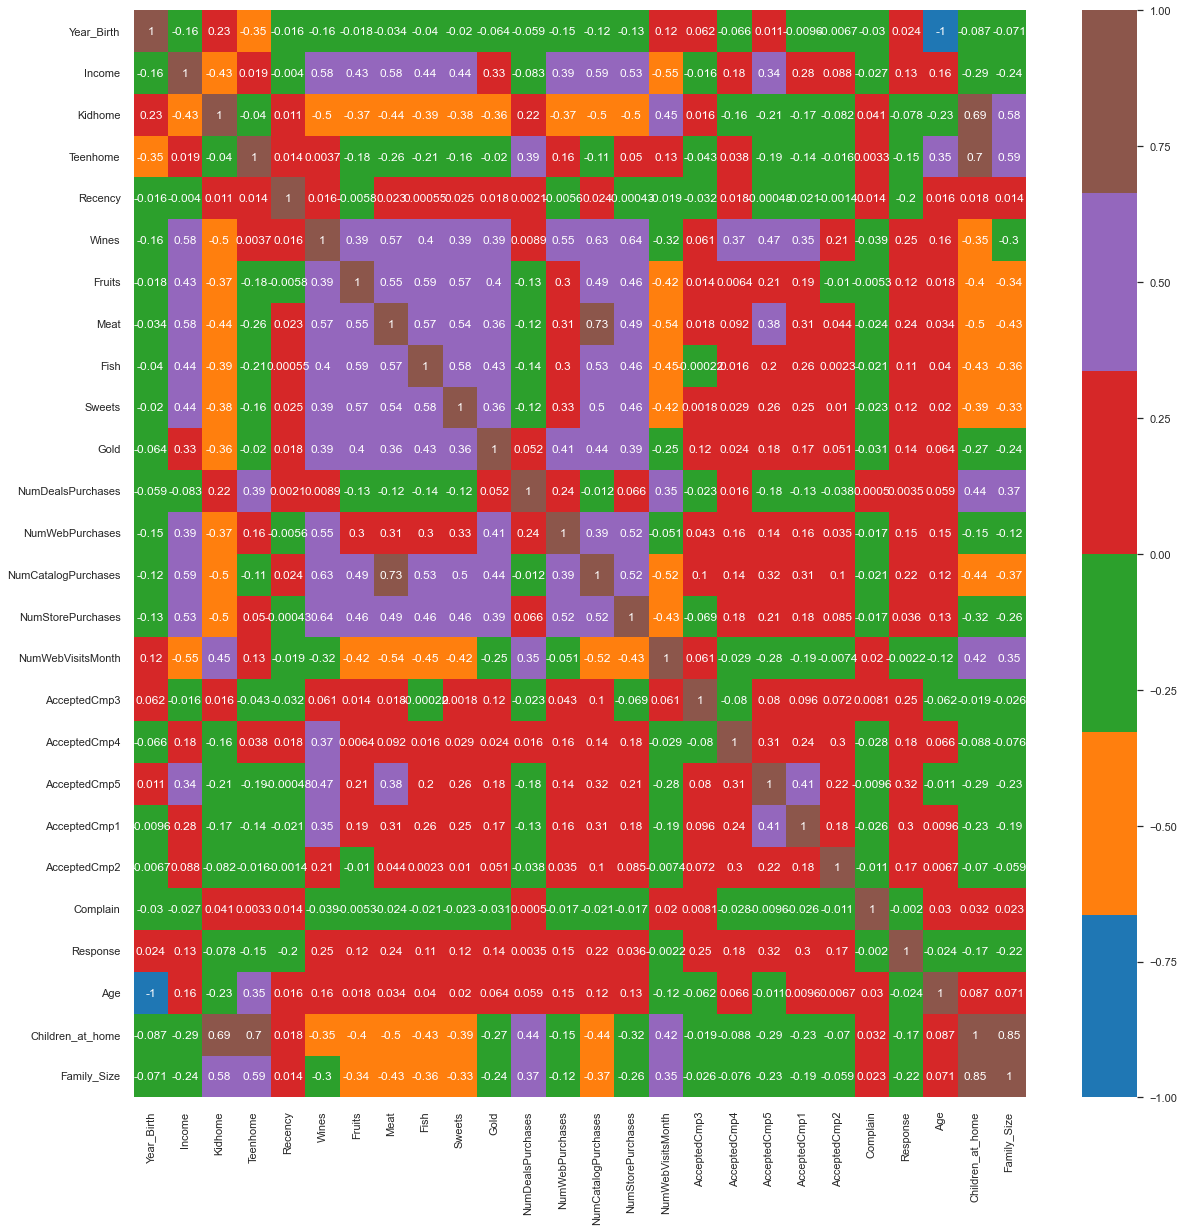

In [31]:
plt.figure(figsize=(20,20)) 
cmap = colors.ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
sns.heatmap(df.corr(),annot=True, cmap=cmap, center=0)

### From the correlation map above we see that we don't have features that highly correlated each other. We have avoided multicollinearity problem. But later we will use PCA to reduce our features to certain amount of features.

## 4.4. Statistics Visualization

### Here we see the distribution of customer's recency related to with whom they live

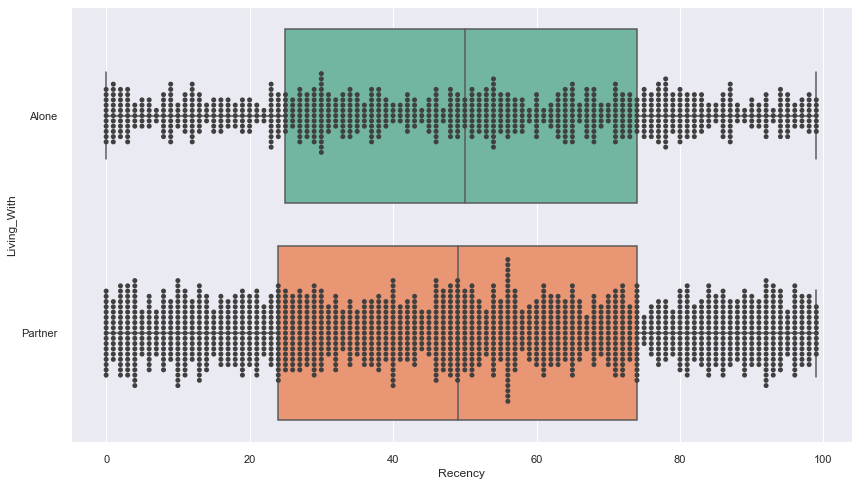

In [32]:
sns.set()
plt.figure(figsize=(14,8))


ax = sns.boxplot(data=df, x='Recency', y='Living_With',orient="h", palette="Set2")
ax = sns.swarmplot(x='Recency', y='Living_With', data=df, color=".25")

### Here we see the distribution of amount of money spent by customers to buy wines based on their marital status.

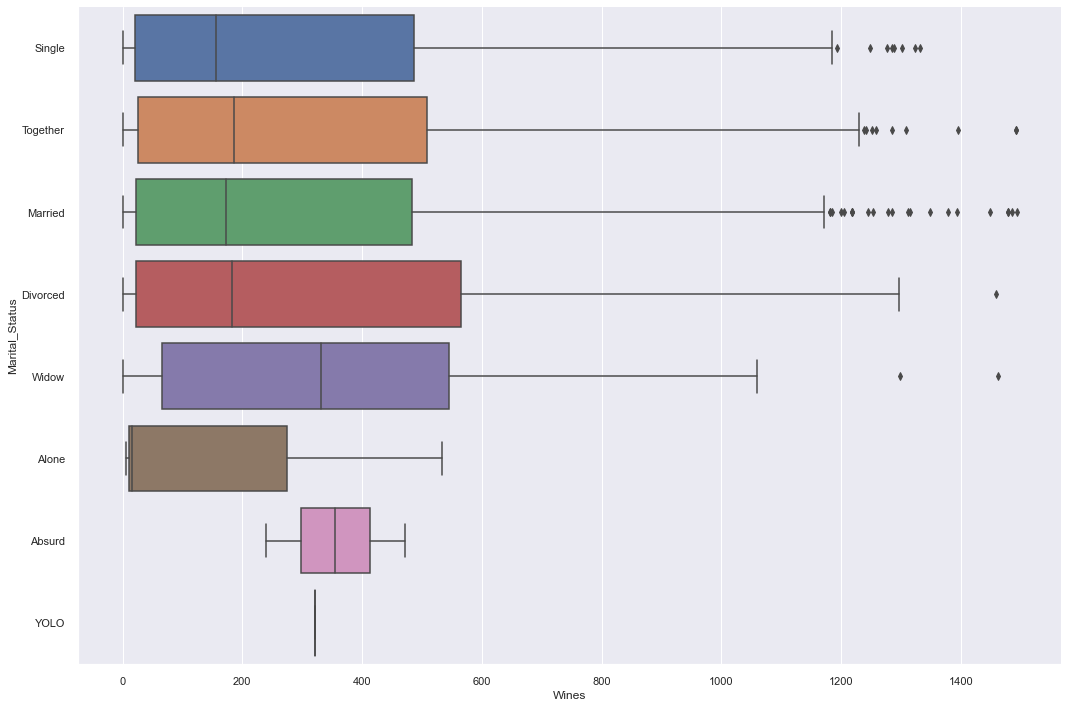

In [33]:
sns.catplot(y="Marital_Status", x="Wines", data=df,kind='box',height=10, aspect=1.5)

### And here we see the distribution of amount of money spent by customers to buy Sweets based on their marital status.

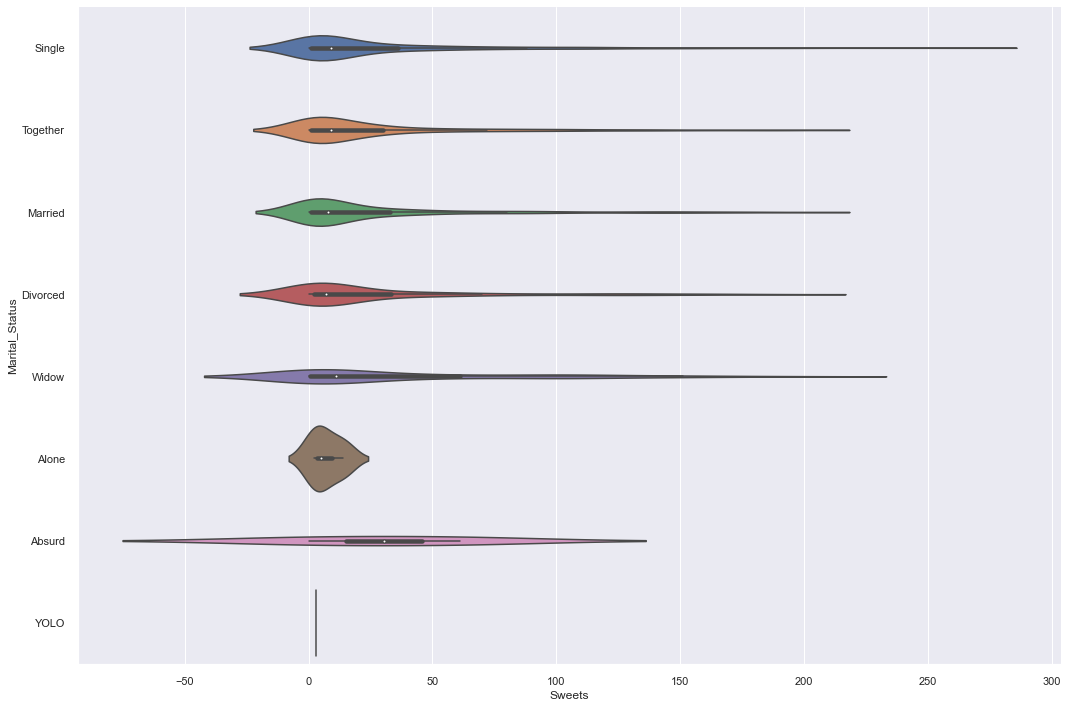

In [34]:
sns.catplot(y="Marital_Status", x="Sweets",kind='violin' ,data=df,height=10, aspect=1.5)

# 5. Data Preprocessing

## 5.1. Checking For Outlier 

In [35]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_at_home,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,52.179603,0.947202,2.592509
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.749062,0.905722
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,1.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,2.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,1.000000,3.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1.000000,3.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000,3.000000,5.000000


### I will check for Income feature because it's suspicious

### I will use IQR Method

In [36]:
Q11 = df['Income'].quantile(0.25)
Q31 = df['Income'].quantile(0.75)
IQR1 = Q31-Q11

In [37]:
df[df['Income']>(Q31+(1.5*IQR1))]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_at_home,Living_With,Family_Size
164,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,48,1,Partner,3
617,1976,PhD,Together,162397.0,1,1,2013-03-06,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,45,2,Partner,4
655,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,46,0,Alone,1
687,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,39,0,Partner,2
1300,1971,Master,Together,157733.0,1,0,2013-04-06,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,50,1,Partner,3
1653,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,44,0,Partner,2
2132,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,72,0,Partner,2
2233,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,44,1,Partner,3


In [38]:
df[df['Income']<(Q11-(1.5*IQR1))]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_at_home,Living_With,Family_Size


### Then we see that we have 8 data instances which are outliers. We can remove them.

In [39]:
df = df[-((df['Income']>(Q31+(1.5*IQR1))))]

In [40]:
df.shape

(2208, 30)

## 5.2. Encoding data

In [41]:
df_new= df.copy()
for col in df_new.select_dtypes(include='O').columns:
    df_new[col]=le.fit_transform(df_new[col])

In [42]:
df_new.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_at_home,Living_With,Family_Size
0,1957,2,4,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,0,1
1,1954,2,4,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,0,3
2,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,1,2
3,1984,2,5,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,1,3
4,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,1,3


## 5.3. Scaling Data

In [43]:
scaler = StandardScaler()

In [44]:
dfs = df_new.drop(['Dt_Customer','Year_Birth'],axis=1)

In [45]:
scaler.fit(dfs)
dfs = pd.DataFrame(scaler.transform(dfs),columns=dfs.columns)
dfs.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_at_home,Living_With,Family_Size
0,-0.348237,0.254807,0.314089,-0.823235,-0.930428,0.310588,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621,0.362555,1.426013,2.628870,-0.561314,0.690245,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,2.372895,0.984809,-1.266476,-1.346380,-1.758805
1,-0.348237,0.254807,-0.255431,1.039166,0.907126,-0.380686,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161,-0.167943,-1.132369,-0.587934,-1.178383,-0.138499,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,-0.421426,1.235034,1.404373,-1.346380,0.449578
2,-0.348237,1.183211,0.964782,-0.823235,-0.930428,-0.795450,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720,-0.698440,1.426013,-0.230512,1.289891,-0.552871,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,-0.421426,0.317541,-1.266476,0.742732,-0.654613
3,-0.348237,1.183211,-1.206626,1.039166,-0.930428,-0.795450,-0.874529,-0.563226,-0.667335,-0.506535,-0.586807,-0.754451,-0.167943,-0.766886,-0.945357,-0.561314,0.275873,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,-0.421426,-1.267219,0.068949,0.742732,0.449578
4,1.431640,-0.673598,0.321573,1.039166,-0.930428,1.554881,-0.394444,0.415851,-0.217388,0.150388,-0.002975,-0.561551,1.423550,0.329564,0.126911,0.055754,-0.138499,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,-0.421426,-1.016993,0.068949,0.742732,0.449578


## 5.4. Dimensionality Reduction Using Principal Component Analysis (PCA)

### Here i will reduce our features into three features

In [46]:
pca = PCA(n_components=3)
pca.fit(dfs)
PCA_dfs = pd.DataFrame(pca.transform(dfs), columns=(["col_reduction","col_reduction2", "col_reduction3"]))
PCA_dfs.describe().T

,count,mean,std,min,25%,50%,75%,max
col_reduction,2208.0,1.222854e-16,2.752981,-5.946408,-2.367559,-0.756993,2.179087,7.995140
col_reduction2,2208.0,1.287215e-16,1.637833,-3.802066,-1.314160,-0.090449,1.139153,6.201395
col_reduction3,2208.0,-2.333077e-17,1.390113,-3.324662,-0.693174,-0.148435,0.312142,8.843273


In [47]:
PCA_dfs

,col_reduction,col_reduction2,col_reduction3
0,4.339955,-0.698635,-0.264084
1,-2.680343,0.202138,-0.119011
2,2.071984,-0.414892,-1.185162
3,-2.520705,-1.456485,-0.017982
4,-0.534832,0.354002,-0.525493
5,0.525230,1.511206,-0.545309
6,0.646447,0.557704,-0.841520
7,-2.311483,-0.846139,0.437027
8,-2.519745,-1.189251,1.764896
9,-5.124651,0.875849,1.801471


### Then we can see our PCA data distribution in 3-D plot.

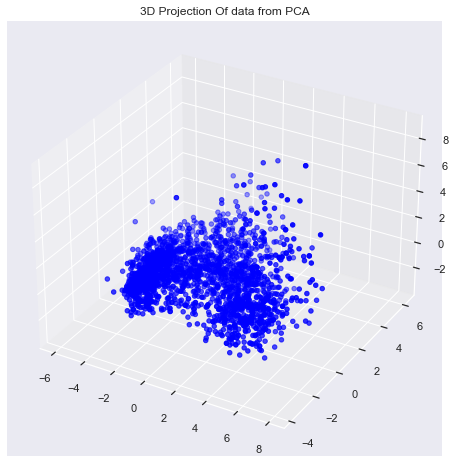

In [48]:
x =PCA_dfs["col_reduction"]
y =PCA_dfs["col_reduction2"]
z =PCA_dfs["col_reduction3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("3D Projection Of data from PCA")
plt.show()

# 6. Clustering

## 1. Elbow Method

### Here we use elbow method to determine the optimal number of clusters

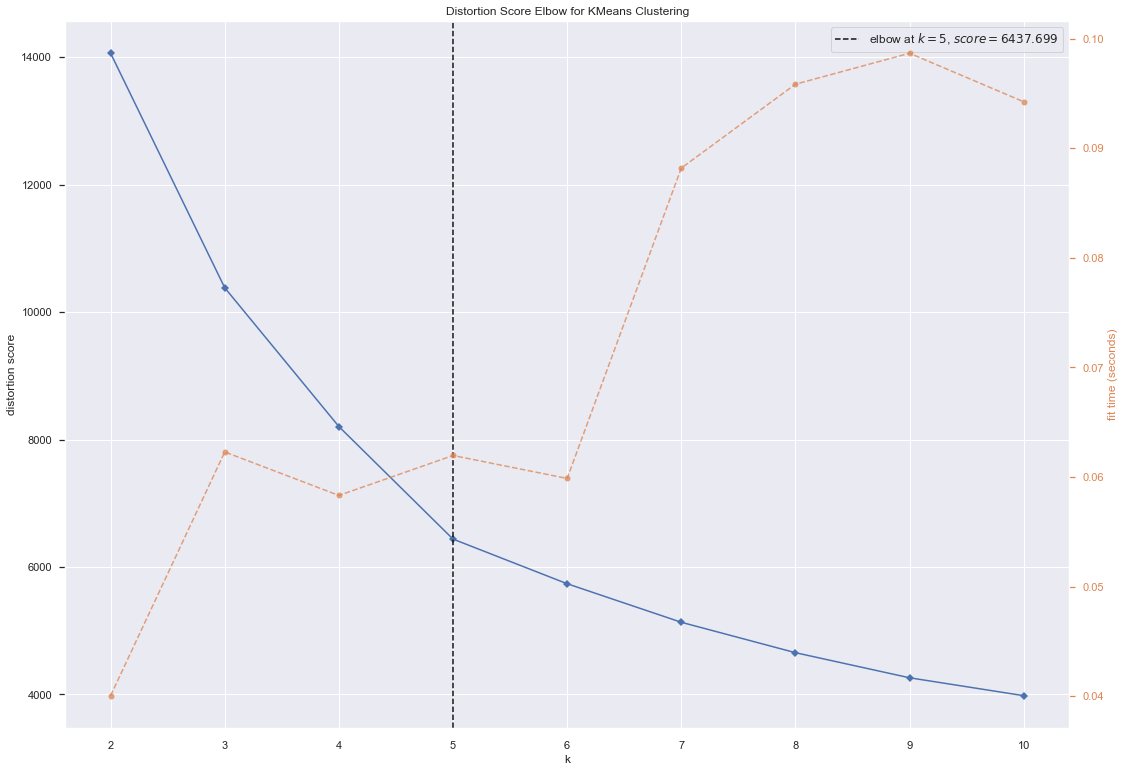

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_dfs)
Elbow_M.show()

### We got our optimal number of clusters for our K-Means algorithm is five (5).

## 2. K-Means Clustering

In [50]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(PCA_dfs)

In [51]:
PCA_dfs["Clusters"] = y_kmeans
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= y_kmeans

/var/folders/52/_h12ds1j0_5c854m0gwwj0y80000gn/T/ipykernel_13903/3032240563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clusters"]= y_kmeans


In [52]:
PCA_dfs.head()

,col_reduction,col_reduction2,col_reduction3,Clusters
0,4.339955,-0.698635,-0.264084,3
1,-2.680343,0.202138,-0.119011,0
2,2.071984,-0.414892,-1.185162,3
3,-2.520705,-1.456485,-0.017982,2
4,-0.534832,0.354002,-0.525493,1


In [53]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_at_home,Living_With,Family_Size,Clusters
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,Alone,1,3
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,Alone,3,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,Partner,2,3
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,Partner,3,2
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,Partner,3,1


### Then we can plot our clusters distribution in 3-D plot.

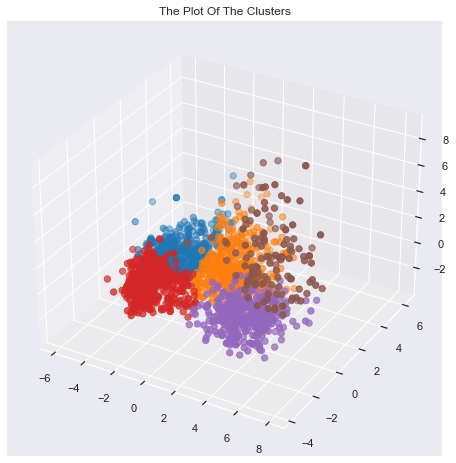

In [54]:
#Plotting the clusters
import matplotlib.cm as cmap
from matplotlib import colors
cmap = colors.ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_dfs["Clusters"], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

## 3. Model Evaluation

### Since we don't have target label in our data, we evaluate our clustering model by examining our clusters' distribution.

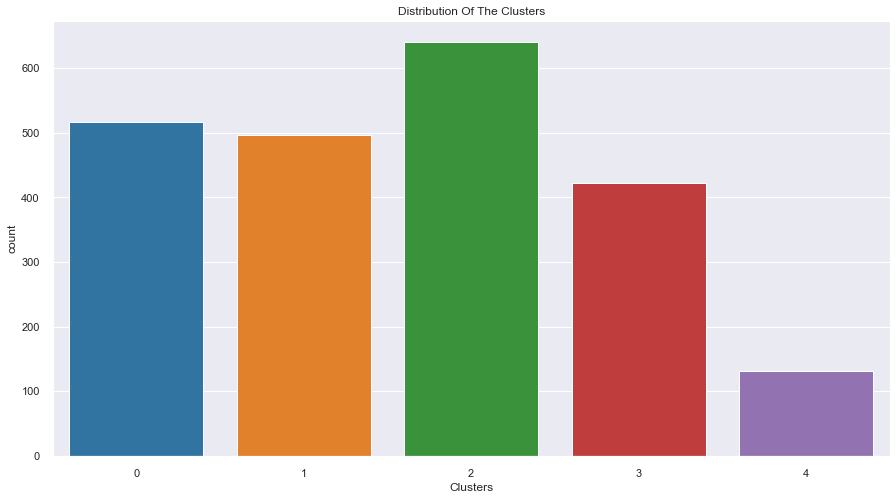

In [55]:
#Plotting countplot of clusters
plt.figure(figsize=(15,8))
pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd']
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

### Here we see that there is one cluster that has less numbers of data than other clusters. It seems that the choice of 5 clusters is not the best option we have. From the elbow plot before we have seen that 5 clusters is the optimal clusters, but we have another option i.e. 4 clusters. From the plot it seems the selection of 4 clusters would still be fine. Let's try this out.

### Here i am using 4 clusters instead of 5 clusters

In [56]:
kmeansmodel2 = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans2= kmeansmodel2.fit_predict(PCA_dfs)

In [57]:
PCA_dfs["Clusters2"] = y_kmeans2
#Adding the Clusters feature to the orignal dataframe.
df["Clusters2"]= y_kmeans2

/var/folders/52/_h12ds1j0_5c854m0gwwj0y80000gn/T/ipykernel_13903/3954272126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clusters2"]= y_kmeans2


In [58]:
PCA_dfs.head()

,col_reduction,col_reduction2,col_reduction3,Clusters,Clusters2
0,4.339955,-0.698635,-0.264084,3,1
1,-2.680343,0.202138,-0.119011,0,3
2,2.071984,-0.414892,-1.185162,3,1
3,-2.520705,-1.456485,-0.017982,2,0
4,-0.534832,0.354002,-0.525493,1,2


In [59]:
PCA_dfs['Clusters2'].value_counts()

0    644
1    543
3    516
2    505
Name: Clusters2, dtype: int64

In [60]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_at_home,Living_With,Family_Size,Clusters,Clusters2
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,Alone,1,3,1
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,Alone,3,0,3
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,Partner,2,3,1
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,Partner,3,2,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,Partner,3,1,2


### And we can plot it again

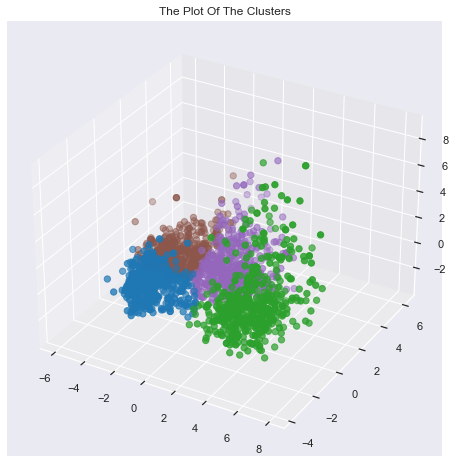

In [61]:
#Plotting the clusters
import matplotlib.cm as cmap
from matplotlib import colors
cmap = colors.ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_dfs["Clusters2"], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

### And we re-evaluate our clusters by looking at their distribution

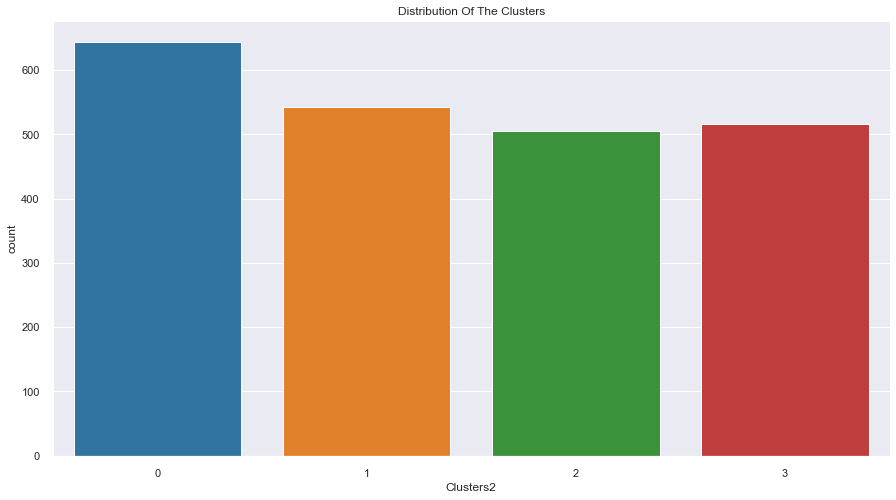

In [62]:
#Plotting countplot of clusters
plt.figure(figsize=(15,8))
pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
pl = sns.countplot(x=df["Clusters2"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

### Here we see that they have better distribution. From 4 clusters we see that each of them has almost the same amount of data. It makes more sense when we separate our data into several clusters with the same amount of data.